# Developing scripts for skill assessment

In [1]:
import cartopy
import cartopy.crs as ccrs

cartopy.config["pre_existing_data_dir"] = "../../data/cartopy-data"
cartopy.config["data_dir"] = "../../data/cartopy-data"

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

from src.assess_skill import assess_skill

/g/data/xv83/users/ds0092/software/miniconda3/envs/forecast_analysis/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [3]:
xr.set_options(keep_attrs=True)

## Load some data to process

In [8]:
config = "../../config/skill/CanESM5.yml"
save_dir = "../../data/skill/"

skill = assess_skill(config, save_dir, save=False)

AttributeError: The lead dimension must must have a valid units attribute. Valid options are: ['years', 'seasons', 'months', 'weeks', 'pentads', 'days', 'minutes', 'hours', 'seconds']

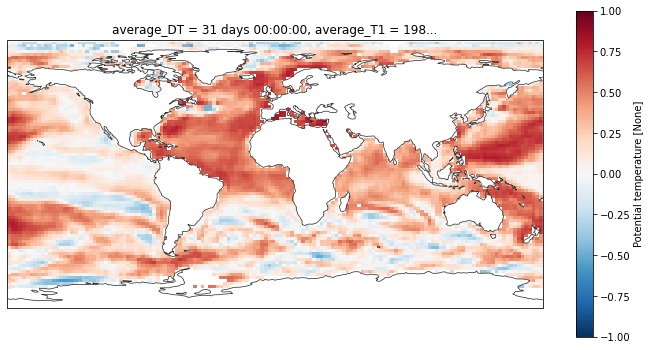

In [7]:
to_plot = skill[0]["sst"]

fig = plt.figure(figsize=(12, 6), edgecolor="k")
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))

p = (
    to_plot.sel(skill="initialized")
    .isel(lead=1)
    .plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-1, vmax=1, cmap="RdBu_r")
)

p.axes.coastlines(color=[0.2, 0.2, 0.2], linewidth=0.75)

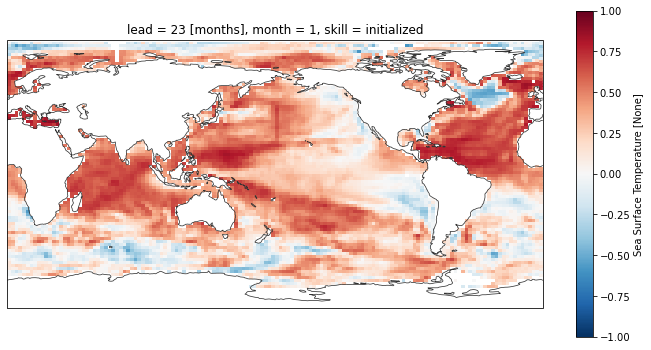

In [17]:
to_plot = skill[0]["sst"]

fig = plt.figure(figsize=(12, 6), edgecolor="k")
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(0))

p = (
    to_plot.sel(skill="initialized")
    .isel(lead=1)
    .plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-1, vmax=1, cmap="RdBu_r")
)

p.axes.coastlines(color=[0.2, 0.2, 0.2], linewidth=0.75)

In [29]:
a = xr.open_zarr("../../data/processed/CanESM5_hist.annual.anom_1991-2020.sst.zarr")

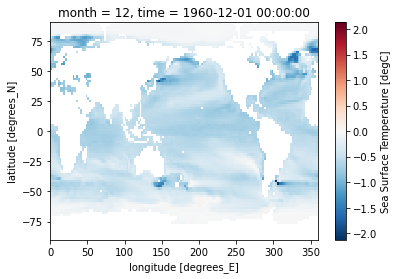

In [31]:
a["sst"].mean("member").isel(time=0).plot()